In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize
plt.rcParams["figure.figsize"] = (15,7)
plt.rcParams['figure.dpi'] = 60

import seaborn as sns
sns.set(font_scale = 2) 

import warnings
warnings.filterwarnings("ignore")

## 2.1 Разбиение набора данных

In [2]:
df=pd.read_csv('result_data.csv')

Разобъём набор данных таким образом, как это рекомендовано согласно документации `Sklearn`. А именно `30 на 70`. Как представленно в описании, такая выборка является оптимальной, поскольку абсолютное большинство данных должно находится при обучении модели, чтобы получить наиболее оптимизированную модель со стороны её точности

### Стратификация
При разделении стратифицируем данные, чтобы получить одинаковую в процентом соотношении выборку, чтобы не было перевеса на какой-то один класс и такая ситуация не повлияла на некорректное обучение модели. 

**Стратифицированое разбиение данных будет производиться по атрибуту региона, чтобы каждое значение этого столбца попало и в тестовую выборку, и в обучающую**

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,mean_new_cases,mean_new_deaths,Rt
0,MEX,North America,Mexico,2022-05-15,5745652.0,0.0,853.143,324465.0,0.0,18.714,...,1.38,75.05,0.779,0.0,0.0,0.0,0.0,6589.737686,363.770905,0.0
1,MEX,North America,Mexico,2022-05-16,5752441.0,6789.0,969.857,324617.0,152.0,21.714,...,1.38,75.05,0.779,0.0,0.0,0.0,0.0,6589.737686,363.770905,0.0
2,MEX,North America,Mexico,2022-05-17,5752441.0,0.0,0.000,324617.0,0.0,0.000,...,1.38,75.05,0.779,0.0,0.0,0.0,0.0,6589.737686,363.770905,0.0
3,MEX,North America,Mexico,2022-05-18,5752441.0,0.0,0.000,324617.0,0.0,0.000,...,1.38,75.05,0.779,0.0,0.0,0.0,0.0,6589.737686,363.770905,0.0
4,MEX,North America,Mexico,2022-05-19,5752441.0,0.0,0.000,324617.0,0.0,0.000,...,1.38,75.05,0.779,0.0,0.0,0.0,0.0,6589.737686,363.770905,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188554,PCN,Oceania,Pitcairn,2021-06-16,0.0,0.0,0.000,0.0,0.0,0.000,...,0.00,0.00,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
188555,PCN,Oceania,Pitcairn,2021-06-17,0.0,0.0,0.000,0.0,0.0,0.000,...,0.00,0.00,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
188556,PCN,Oceania,Pitcairn,2021-06-18,0.0,0.0,0.000,0.0,0.0,0.000,...,0.00,0.00,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
188557,PCN,Oceania,Pitcairn,2021-06-19,0.0,0.0,0.000,0.0,0.0,0.000,...,0.00,0.00,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [4]:
df['date']=pd.to_datetime(df['date'])

In [5]:
df['day']=df['date'].apply(lambda x: x.day)

In [6]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [7]:
df=df[df['Rt']<5].reset_index(drop=True)

### Определение переменной опасности

In [8]:
df1=df[df['Rt']<=0.7]
df1['Danger']=0

C:\Users\eugen\AppData\Local\Temp\ipykernel_17292\1377177328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Danger']=0


In [9]:
df2=df[(df['Rt']>0.7) & (df['Rt']<=0.95)]
df2['Danger']=1

C:\Users\eugen\AppData\Local\Temp\ipykernel_17292\2344824658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Danger']=1


In [10]:
df3=df[df['Rt']>0.95]
df3['Danger']=2

C:\Users\eugen\AppData\Local\Temp\ipykernel_17292\132883819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Danger']=2


In [11]:
df=pd.concat([df1, df2, df3]).reset_index(drop=True)

In [12]:
X=df[['new_cases', 'new_deaths', 'Rt']]
y=df['Danger']

## Разбиение

In [13]:
#Получение выборок
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

## 2.2 Визуализация зависимостей данных
Рассмотрим несколько способов визуализации, это heatmap, reg plot, points distribution и corr plot. 

Данные способы визуализации были выбраны, потому что они визуально понятно показывают необходимую информацию.



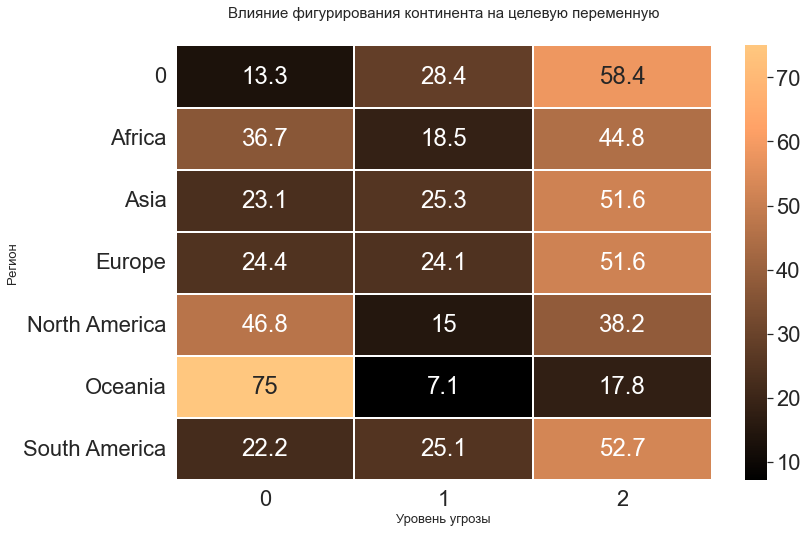

In [14]:
#Данные визуализации сводной таблицы
pt = pd.pivot_table(df, index='continent', columns='Danger', aggfunc='size', fill_value=0)
#Приведение данных к единому процентному соотношению
pt = pt.apply(lambda x: round(x / x.sum() * 100,1), axis=1)
#Воспроизведение визуализации 
plt.figure(figsize=(12, 8), dpi=72)
ax = sns.heatmap(pt, annot=True, linewidths=0.1, cmap="copper", fmt='g');
#Наименование осей и названия вазиулизации
ax.set_title('Влияние фигурирования континента на целевую переменную', fontsize = 15, y=1.05)
ax.set_xlabel('Уровень угрозы', fontsize = 13)
ax.set_ylabel('Регион', fontsize = 13)
plt.show()

Данный график демонстрирует влияние региона на уровень угрозы(`Danger`). Выше можно увидеть, что наиболее высокий уровень угрозы с повышенным коэффициентом встречается равномернно во всех регионах кроме островного(`Oceania`). Минимальный уровень угрозы демонстрируется как раз в регионе `Oceania`. 0 можно не брать в рассчёт, т.к. данная переменная указывает на неизвостность региона

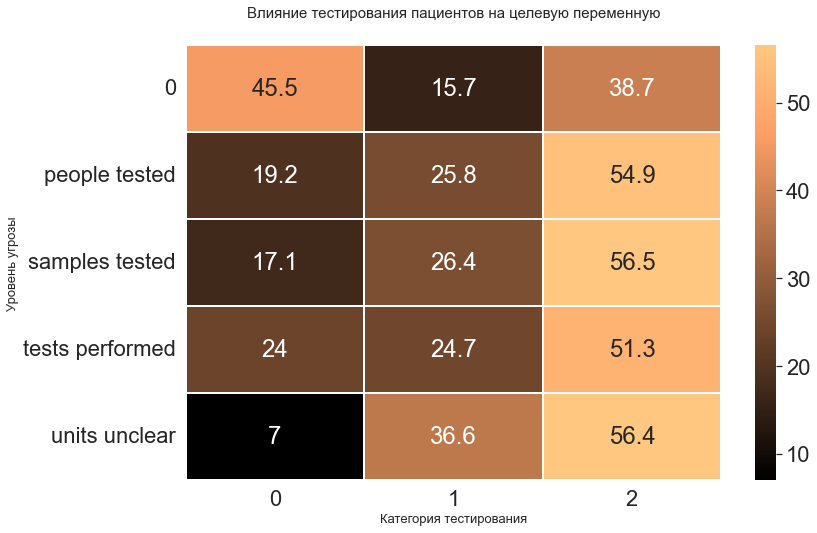

In [15]:
#Данные визуализации сводной таблицы
pt = pd.pivot_table(df, index='tests_units', columns='Danger', aggfunc='size', fill_value=0)
#Приведение данных к единому процентному соотношению
pt = pt.apply(lambda x: round(x / x.sum() * 100,1), axis=1)
#Воспроизведение визуализации 
plt.figure(figsize=(12, 8), dpi=72)
ax = sns.heatmap(pt, annot=True, linewidths=0.1, cmap="copper", fmt='g');
#Наименование осей и названия вазиулизации
ax.set_title('Влияние тестирования пациентов на целевую переменную', fontsize = 15, y=1.05)
ax.set_xlabel('Категория тестирования', fontsize = 13)
ax.set_ylabel('Уровень угрозы', fontsize = 13)
plt.show()

Данный график демонстрирует тестирования пациентов на уровень угрозы(`Danger`). Выше можно увидеть, что наиболее высокие показатели по колличеству тестирования содержится в уровне опсности 2. Минимальные показатели тестирования содержатся среди минимального уровня опасности 

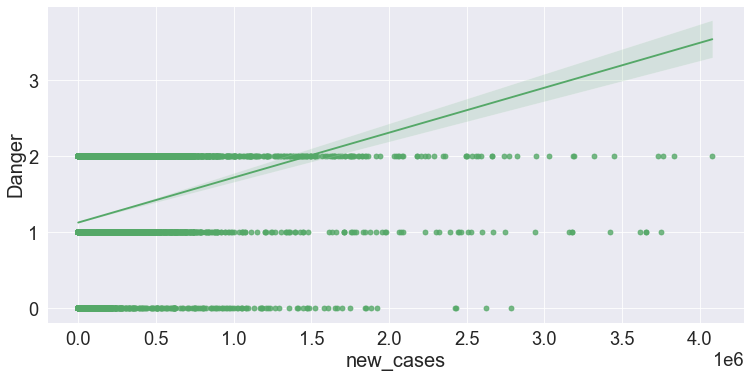

In [16]:
ax = sns.regplot(x=df['new_cases'], y=df['Danger'], color="g")

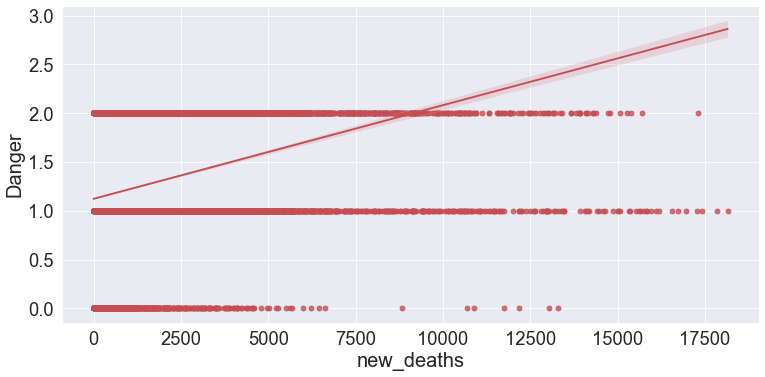

In [17]:
ax = sns.regplot(x=df['new_deaths'], y=df['Danger'], color="r")

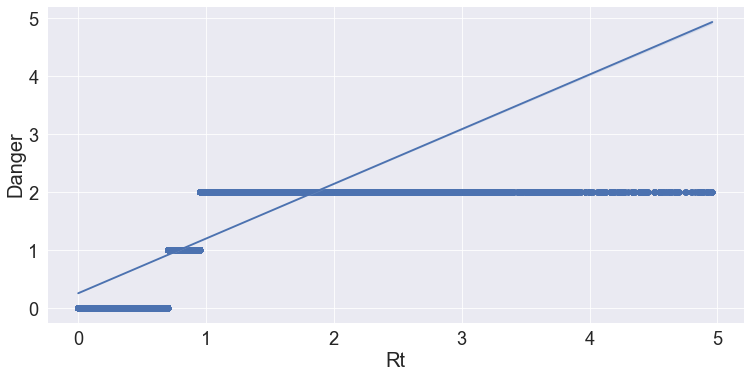

In [18]:
ax = sns.regplot(x=df['Rt'], y=df['Danger'], color="b")

Три графика выше демонстрируют линейную зависимость переменной Danger от целевой переменных X. Как можно увидеть, все эти три графика имеют почти идиальную линию идущую от низа вверх. Это означает, что в этих данных существует явная зависимость переменной Danger от переменных выше

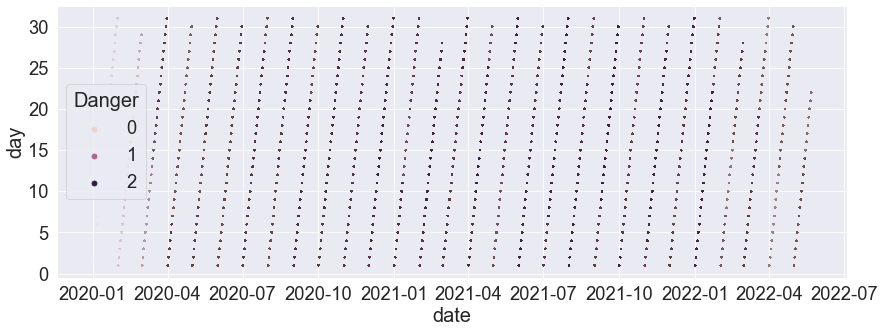

In [19]:
plt.figure(figsize=(17, 6))
sns.scatterplot(data=df, x='date', y='day', alpha=0.005, s=13, hue='Danger');

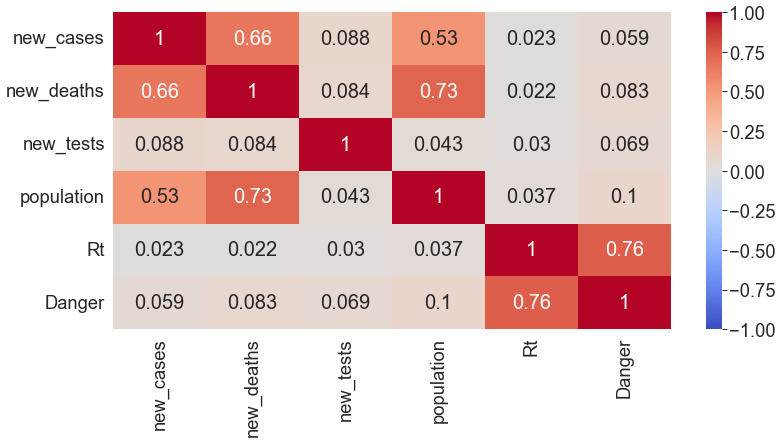

In [20]:
corrDf=df[['new_cases', 'new_deaths', 'new_tests', 'population', 'Rt', 'Danger']]

corrMatrix = corrDf.corr()
sns.heatmap(corrMatrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

Согласно корреляции Пирсона выше, можно увидеть, что наибольшее влияние на целевую переменную Danger имеет только Rt - индекс распространения инфекции. 

## 2.3 Классифиткация 

Рассмотрим три модели классификации
### KNeighborsClassifier
Классификация на основе соседей - это тип обучения на основе экземпляров или необобщающего обучения: он не пытается построить общую внутреннюю модель, а просто сохраняет экземпляры обучающих данных. Классификация вычисляется простым большинством голосов ближайших соседей каждой точки: точке запроса назначается класс данных, который имеет наибольшее количество представителей среди ближайших соседей точки.

### RandomForestClassifier
Случайный лес — это метаоценка, которая соответствует ряду классификаторов дерева решений для различных подвыборок набора данных и использует усреднение для повышения точности прогнозирования и контроля переобучения. Размер подвыборки управляется параметром max_samples, если bootstrap=True (по умолчанию), в противном случае для построения каждого дерева используется весь набор данных
### GaussianNB
Наи́вный ба́йесовский классифика́тор — простой вероятностный классификатор, основанный на применении теоремы Байеса со строгими (наивными) предположениями о независимости. В зависимости от точной природы вероятностной модели, наивные байесовские классификаторы могут обучаться очень эффективно

## Матрикики
Рассмотрим две метрикики для оценивания модели классификации

### accuracy f1-score
Это гармоническое среднее значений точности и полноты. Возьмём её, потому что она дает лучшую оценку неправильно классифицированных случаев

### macro avg f1-score

macro avg f1-score пожалуй, самый простой из многочисленных методов усреднения. Макроусредненная оценка F1 (или макрооценка F1) вычисляется путем взятия среднего арифметического (также известного как невзвешенное среднее) всех оценок F1 для каждого класса. Этот метод будет взят, поскольку он обрабатывает все классы одинаково, независимо от их значений поддержки

## 2.4 Обучение

In [21]:
#Импорт моделей
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [22]:
#Обучение
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
preds=neigh.predict(X_test)
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     19843
           1       0.54      0.60      0.57     11034
           2       0.81      0.79      0.80     28070

    accuracy                           0.77     58947
   macro avg       0.74      0.74      0.74     58947
weighted avg       0.78      0.77      0.77     58947



In [23]:
#Обучение
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_preds=rfc.predict(X_test)
print(classification_report(rfc_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19277
           1       1.00      1.00      1.00     12359
           2       1.00      1.00      1.00     27311

    accuracy                           1.00     58947
   macro avg       1.00      1.00      1.00     58947
weighted avg       1.00      1.00      1.00     58947



In [24]:
#Обучение
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_preds=gnb.predict(X_test)
print(classification_report(gnb_preds, y_test))

              precision    recall  f1-score   support

           0       0.99      0.34      0.51     55506
           1       0.04      0.40      0.08      1344
           2       0.05      0.64      0.09      2097

    accuracy                           0.35     58947
   macro avg       0.36      0.46      0.23     58947
weighted avg       0.93      0.35      0.48     58947



### Вывод
Наиболее оптимальной моделью будет `KNeighborsClassifier` c accuracy f1-score = `0.78` и macro avg f1-score = `0.74`, поскольку по сравнению с другими он показал наилучший результат. `RandomForestClassifier` не будет взят, поскольку у него явное переобучение

## 3.4 Feature Engineering

Преобразуем набор данных путём генерации новых данных с целью повышения точности классификатора и использование StandardScaler

In [25]:
#Генерация данных
df['day']=df['date'].apply(lambda x: x.day)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
#Преобразщование с помощью StandardScaler
scaler = StandardScaler()
X=df[['new_cases', 'new_deaths', 'Rt', 'day']]
y=df['Danger']

#Получение выборок
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

#Обучение
rfc = KNeighborsClassifier(n_neighbors=3)
rfc.fit(X_train, y_train)
rfc_preds=rfc.predict(X_test)
print(classification_report(rfc_preds, y_test))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78     20752
           1       0.38      0.46      0.42     10122
           2       0.75      0.73      0.74     28073

    accuracy                           0.69     58947
   macro avg       0.65      0.65      0.64     58947
weighted avg       0.71      0.69      0.70     58947



## Выводы по Feature Engineering 
Из результатов выше видно, что преобразование данных для Feature Engineering не привёло к улучшению модели

## Отчёт
* 2.1 Разбиение набора данных - набор данныхз разбит на обучаюшую и тестовую выборки
* 2.2 Визуализация зависимостей данных - визуализация данных несколькими способами
* 2.3 Классификация - выбраны 3 алгоритма классификации
* 2.4 Обучение - произведена классификация по уровню опасности
* 2.5 Feature Engineering - проведено дополнение набора данных дополнительными данных и обучение модели

In [28]:
# Сохранение данных
df.to_csv('result_data.csv', encoding='utf-8-sig', index=False)